
<left>
    <img src="http://epecora.com.br/DataFiles/PPGOLD_logo.png" width="300" alt="PPGOLD Data Science: INTRO"  />
</left>

# *Data Science - Aula 04*

## Manipulação de DataFrame e Análise Exploratória de Dados
---

Neste exemplo iremos usar as bibliotecas pandas e numpy, e também as gráficas (matplotlib e seaborn) e também uma estatística (scipy.stats)

In [53]:
# import libraries
import pandas as pd  # Biblioteca para os DataFrames 
import numpy as np   # Biblioteca Numérica
import matplotlib.pyplot as plt
import seaborn as sns

# comando para imprimir os gráficos
%matplotlib inline 

# Gráficos maiores
sns.set(rc={'figure.figsize':(15,10)})

import scipy.stats as stats

# Ler o arquivo, e atribua-o à variável "df".
# Fonte: https://www.gapminder.org/data/

my_file = "https://raw.githubusercontent.com/EduPek/PPGOLD7037/main/Data/data_countries_clean.csv"
df = pd.read_csv(my_file)


## Aquela olhada no Data Frame

In [55]:
# Não funciona no GOOGLE COLAB
#from pandas_profiling import ProfileReport

#profile = ProfileReport(df)
#profile.to_file(output_file="output_min.html")

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [56]:
df.head()

,country,year,basic_sanitation_access_percent,child_mortality_0_5_year_olds_dying_per_1000_born,children_per_woman_total_fertility,co2_emissions_tonnes_per_person,employment_rate_percent,hdi,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy,population_total,suicide_per_100000_people
0,Afghanistan,1999,23.5,129.0,7.49,0.0370,45.9,0.345,578,54.7,20800000,NaN
1,Afghanistan,2000,23.5,125.0,7.39,0.0376,45.9,0.347,563,54.8,21600000,NaN
2,Afghanistan,2001,24.6,121.0,7.27,0.0471,47.7,0.378,1190,55.5,22600000,NaN
3,Afghanistan,2002,25.8,117.0,7.14,0.0509,47.9,0.387,1240,56.5,23700000,NaN
4,Afghanistan,2003,26.9,113.0,6.99,0.0368,47.5,0.400,1200,57.1,24700000,NaN


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3613 entries, 0 to 3612
Data columns (total 12 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   country                                                3613 non-null   object 
 1   year                                                   3613 non-null   int64  
 2   basic_sanitation_access_percent                        3115 non-null   float64
 3   child_mortality_0_5_year_olds_dying_per_1000_born      3613 non-null   float64
 4   children_per_woman_total_fertility                     3613 non-null   float64
 5   co2_emissions_tonnes_per_person                        3613 non-null   float64
 6   employment_rate_percent                                3613 non-null   float64
 7   hdi                                                    3613 non-null   float64
 8   income_per_person_gdppercapita_ppp_inflation_adj

## Vamos trocar os nomes das colunas por algo mais curto?

| #      | Column                                                | ShortName       | Count | Dtype   |
|--------|-------------------------------------------------------|-----------------|-------|---------|
| 0      | country                                               | country         | 806   | object  |
| 1      | year                                                  | year            | 806   | int64   |
| 2      | basic_sanitation_access_percent                       | sanitation      | 806   | float64 |
| 3      | child_mortality_0_5_year_olds_dying_per_1000_born     | child_mortality | 806   | float64 |
| 4      | children_per_woman_total_fertility                    | total_fertility | 806   | float64 |
| 5      | co2_emissions_tonnes_per_person                       | co2_emissions   | 806   | float64 |
| 6      | employment_rate_percent                               | employment_rate | 806   | float64 |
| 7      | hdi                                                   | hdi             | 806   | float64 |
| 8      | income_per_person_gdppercapita_ppp_inflation_adjusted | gdp             | 806   | int64   |
| 9      | life_expectancy                                       | life_expectancy | 806   | float64 |
| 10     | population_total                                      | population      | 806   | int64   |
| 11     | suicide_per_100000_people                             | suicide         | 806   | float64 |

In [58]:
df.columns = ['country', 'year', 'sanitation', 
              'child_mortality', 'total_fertility', 
              'co2_emissions', 'employment_rate', 
              'hdi', 'gdp', 'life_expectancy', 
              'population', 'suicide']

## Estatísticas descritivas

In [59]:
df.describe()

,year,sanitation,child_mortality,total_fertility,co2_emissions,employment_rate,hdi,gdp,life_expectancy,population,suicide
count,3613.000000,3115.000000,3613.000000,3613.000000,3613.000000,3613.000000,3613.000000,3613.000000,3613.000000,3.613000e+03,1304.000000
mean,2005.762801,70.647913,37.844528,2.847794,5.228571,57.090922,0.681361,18668.314143,70.632438,3.669136e+07,11.845344
std,6.781467,30.773176,41.620144,1.521447,6.591079,11.023802,0.158159,19098.432749,8.461934,1.323415e+08,7.573063
min,1990.000000,3.400000,1.850000,0.950000,0.015900,28.900000,0.253000,563.000000,32.500000,9.800000e+04,0.045400
25%,2001.000000,44.050000,7.940000,1.660000,0.752000,49.900000,0.565000,4160.000000,65.500000,3.110000e+06,6.555000
50%,2006.000000,85.600000,19.500000,2.290000,2.990000,57.100000,0.705000,11500.000000,72.600000,8.680000e+06,10.900000
75%,2011.000000,97.600000,55.400000,3.780000,7.720000,63.200000,0.806000,29000.000000,77.000000,2.650000e+07,14.800000
max,2016.000000,100.000000,234.000000,7.680000,67.100000,87.800000,0.953000,115000.000000,84.700000,1.420000e+09,44.300000


### Como está distribuído o desemprego ?

<AxesSubplot:xlabel='country', ylabel='employment_rate'>

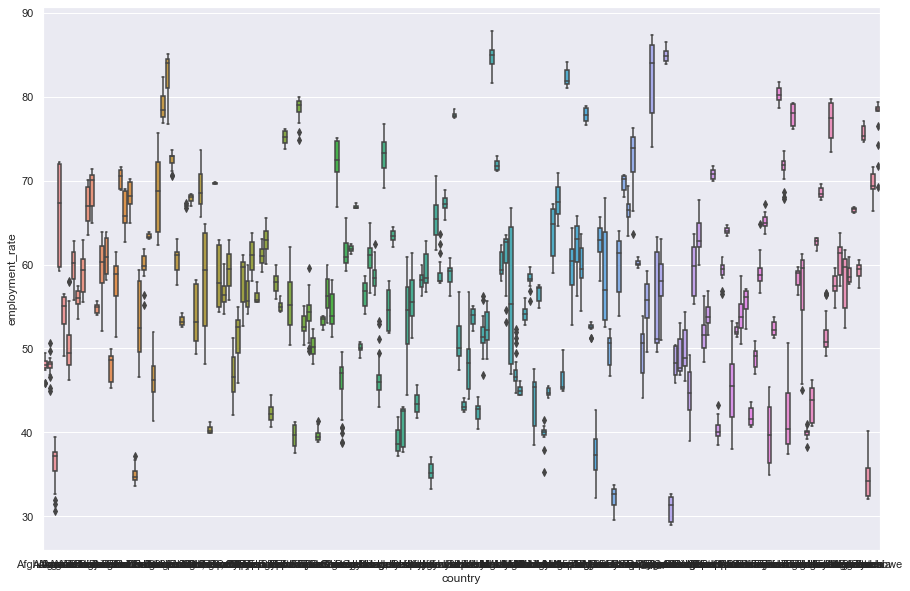

In [60]:
sns.boxplot(x = "country", y = "employment_rate", data = df)

<AxesSubplot:xlabel='year', ylabel='employment_rate'>

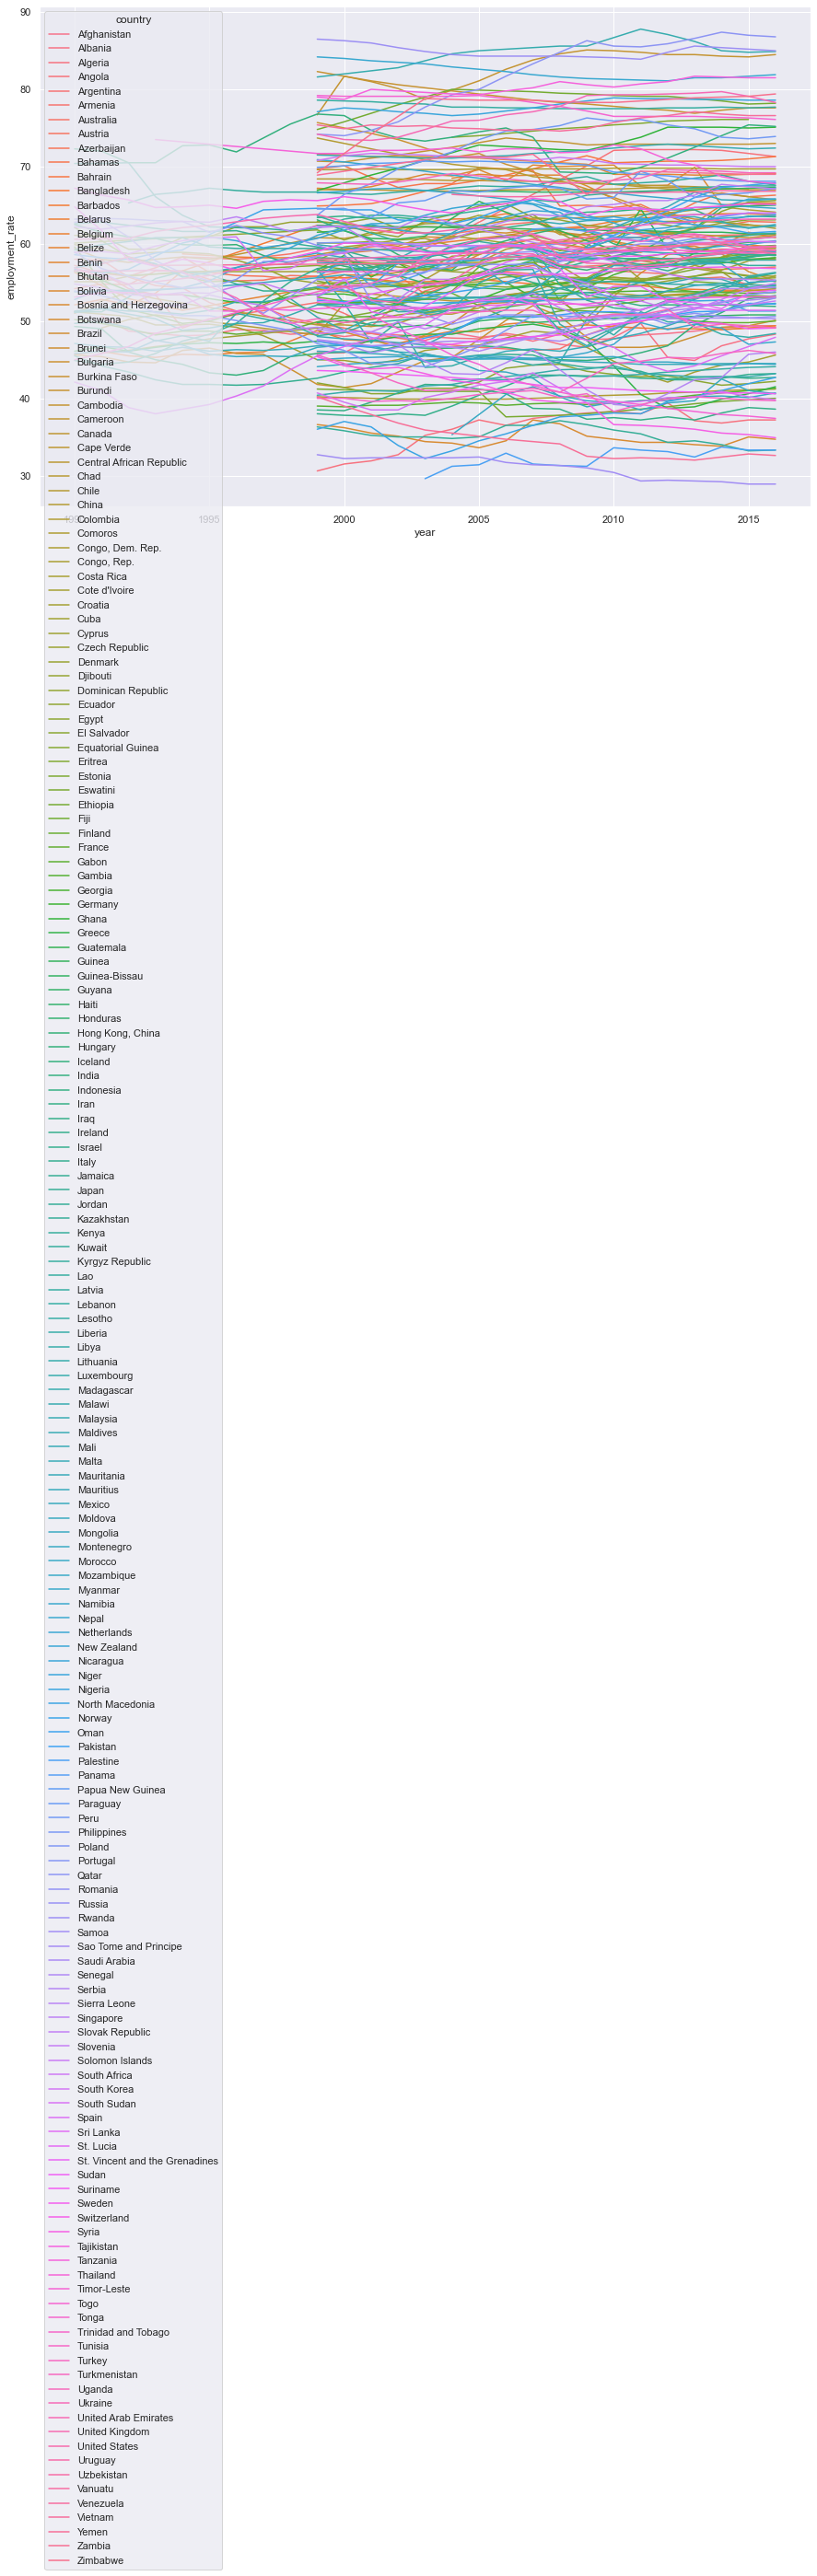

In [61]:
sns.lineplot(x = "year", y = "employment_rate", hue = "country", data = df)

## Como estão distribuídos os dados por países?

In [62]:
# Cria um novo DataFrame com a quantidade de dados por país

df_country = df['country'].value_counts().to_frame()
df_country

,country
Singapore,27
Croatia,27
Netherlands,27
Sweden,27
Malta,27
...,...
Lebanon,13
Eritrea,12
Brunei,9
Turkmenistan,8


In [63]:
df_country.shape

(178, 1)

## Como estão distribuídos os dados por anos?

In [64]:
# Cria um novo DataFrame com a quantidade de dados por ano

df_year = df['year'].value_counts().to_frame()
df_year.reset_index(inplace = True)
df_year.columns = ['year', 'total']
df_year.head()

,year,total
0,2014,178
1,2013,178
2,2011,178
3,2010,178
4,2012,178


## Ordenar pelo ano

In [65]:
df_year.sort_values(by=['year'], inplace = True)
df_year.reset_index(inplace = True)
df_year.head()

,index,year,total
0,22,1990,54
1,20,1991,57
2,18,1992,60
3,19,1993,59
4,21,1994,57


### Visualização Gráfica

<AxesSubplot:xlabel='total', ylabel='year'>

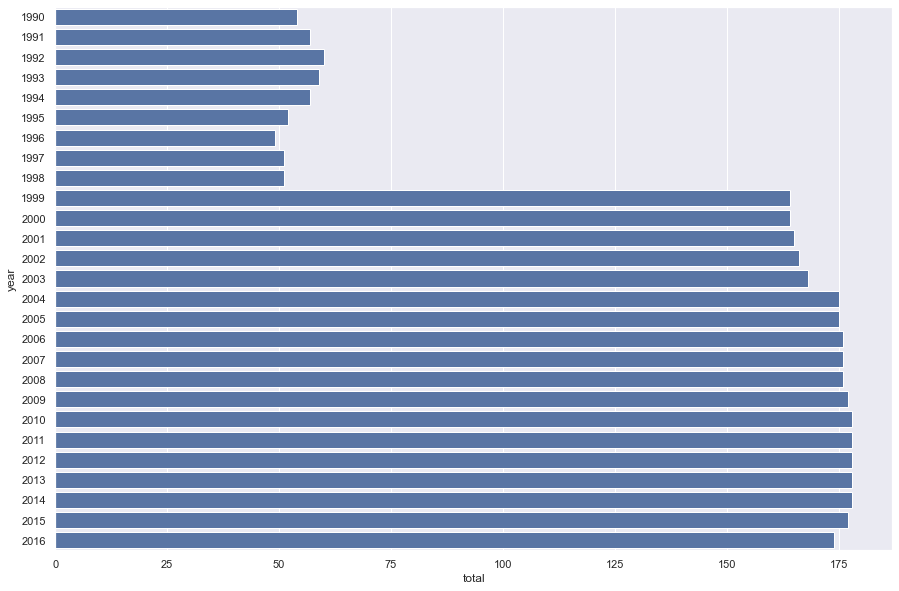

In [66]:
sns.barplot(y = "year", x="total", data=df_year,  color='b',orient = "h")

Text(0, 0.5, '#Data')

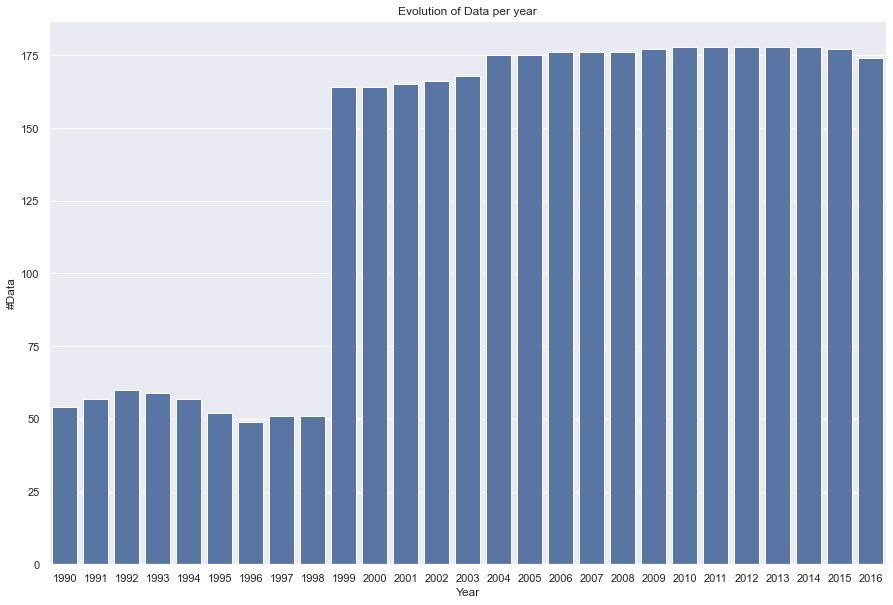

In [67]:
sns.barplot(x = "year", y="total", data=df_year,  color='b')
plt.title('Evolution of Data per year')
plt.xlabel('Year')
plt.ylabel('#Data')

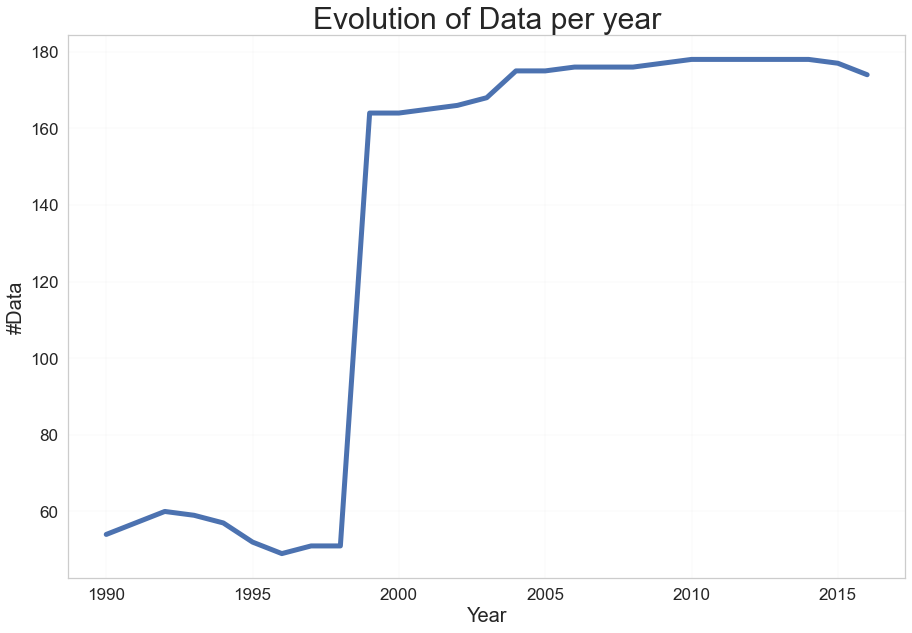

In [68]:
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})

g = sns.lineplot(x = "year", y="total", data=df_year,  color='b',  linewidth = 5 )
g.axes.set_title('Evolution of Data per year',fontsize=30)
g.set_xlabel("Year",fontsize=20)
g.set_ylabel("#Data",fontsize=20)
g.tick_params(labelsize=17)


## Seleção de um subconjunto de linhas do DataFrame

###  Temos muitos países com poucos dados, vamos buscar mais dados ou faremos uma linha de corte?

In [16]:
pontoDeCorte = 20

df_country = df['country'].value_counts().to_frame().reset_index()
df_country = df_country[df_country['country'] >= pontoDeCorte]
c = df_country['index'].unique().tolist()

print("Lista de países com no mínimo {:d} anos de dados".format(pontoDeCorte))
print(type(c))
print(c)

Lista de países com no mínimo 20 anos de dados
<class 'list'>
['Singapore', 'Croatia', 'Netherlands', 'Sweden', 'Malta', 'Slovenia', 'Ukraine', 'Norway', 'Estonia', 'Portugal', 'France', 'Mauritius', 'Greece', 'Denmark', 'Italy', 'Lithuania', 'Tajikistan', 'Kyrgyz Republic', 'Bulgaria', 'Australia', 'Ireland', 'Belgium', 'Switzerland', 'Kazakhstan', 'Luxembourg', 'Germany', 'Finland', 'Hungary', 'Romania', 'New Zealand', 'Latvia', 'South Korea', 'Japan', 'Hong Kong, China', 'Spain', 'Iceland', 'United Kingdom', 'Canada', 'Austria', 'Israel', 'Czech Republic', 'Armenia', 'Moldova', 'Russia', 'Albania', 'Slovak Republic', 'United States', 'Kuwait', 'Poland', 'Barbados', 'Argentina', 'Costa Rica', 'Cuba', 'Azerbaijan', 'Mexico', 'Belarus', 'Trinidad and Tobago', 'Chile', 'Colombia', 'Belize', 'El Salvador', 'Serbia']


# Selecionar somente alguns países para analisar melhor

In [17]:
# Países
c = ['Norway', 'Sweden', 'Denmark', 'Luxembourg' ]
# Novo DataFrame com 4 países
df2 = df[df["country"].isin(c)]

## Boxplots

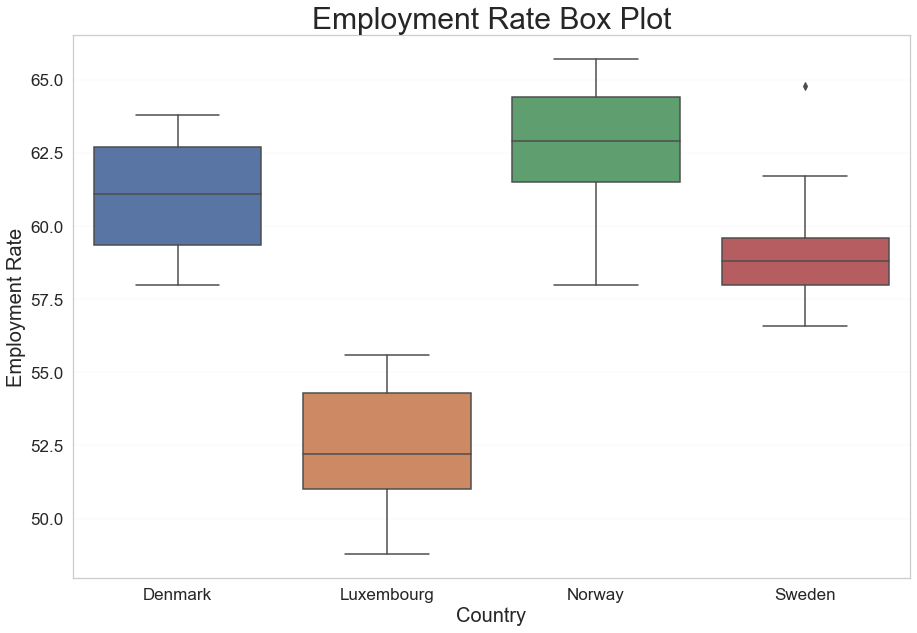

In [18]:
g = sns.boxplot(x = "country", y = "employment_rate", data = df2)
g.axes.set_title('Employment Rate Box Plot',fontsize=30)
g.set_xlabel("Country",fontsize=20)
g.set_ylabel("Employment Rate",fontsize=20)
g.tick_params(labelsize=17)

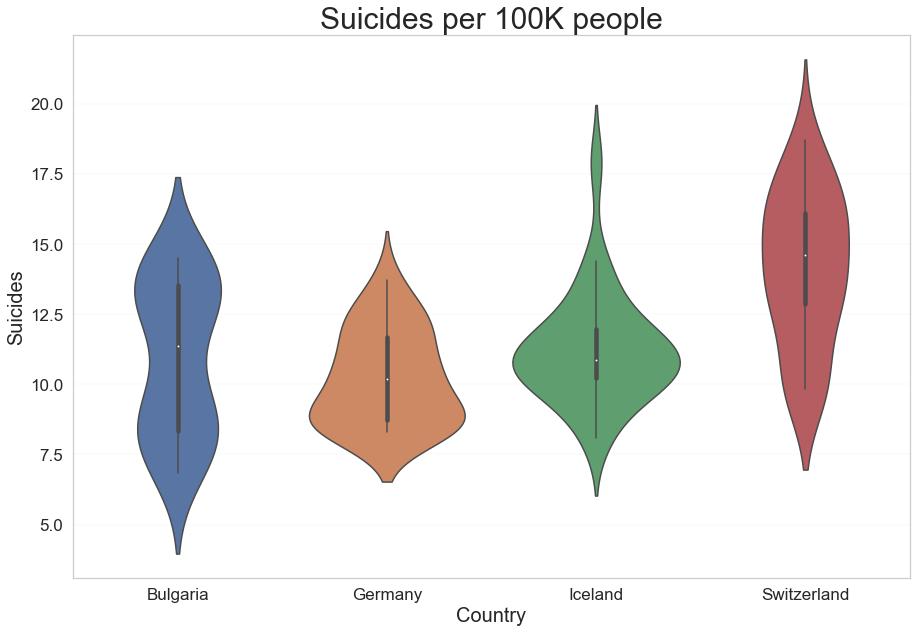

In [19]:
c =  ['Germany','Switzerland','Iceland','Bulgaria']
df3 = df[df["country"].isin(c)]

g = sns.violinplot(x = "country", y = "suicide", data = df3)
g.axes.set_title('Suicides per 100K people',fontsize=30)
g.set_xlabel("Country",fontsize=20)
g.set_ylabel("Suicides",fontsize=20)
g.tick_params(labelsize=17)

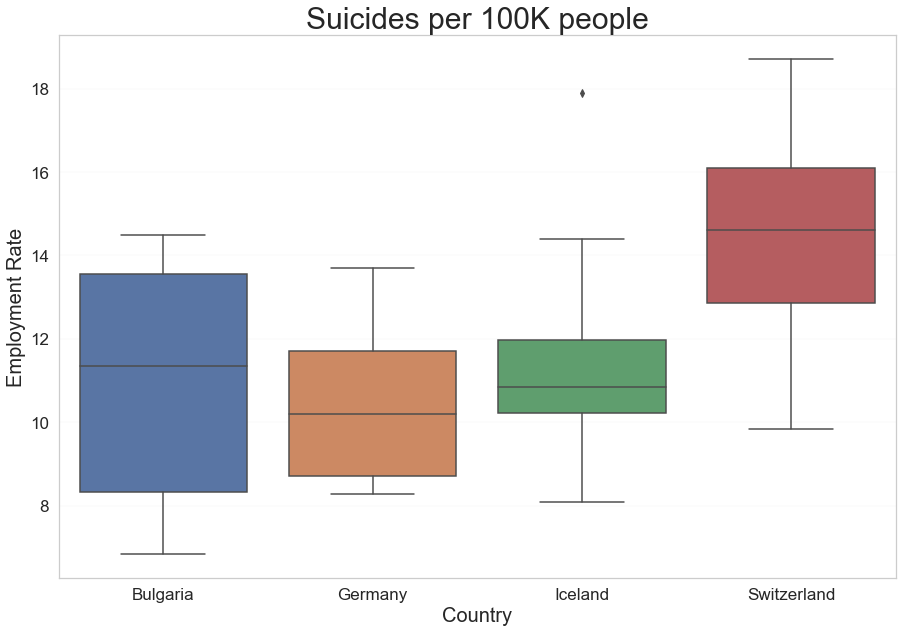

In [20]:
g=sns.boxplot(x = "country", y = "suicide", data = df3)
g.axes.set_title('Suicides per 100K people',fontsize=30)
g.set_xlabel("Country",fontsize=20)
g.set_ylabel("Employment Rate",fontsize=20)
g.tick_params(labelsize=17)

## Scatter Plot

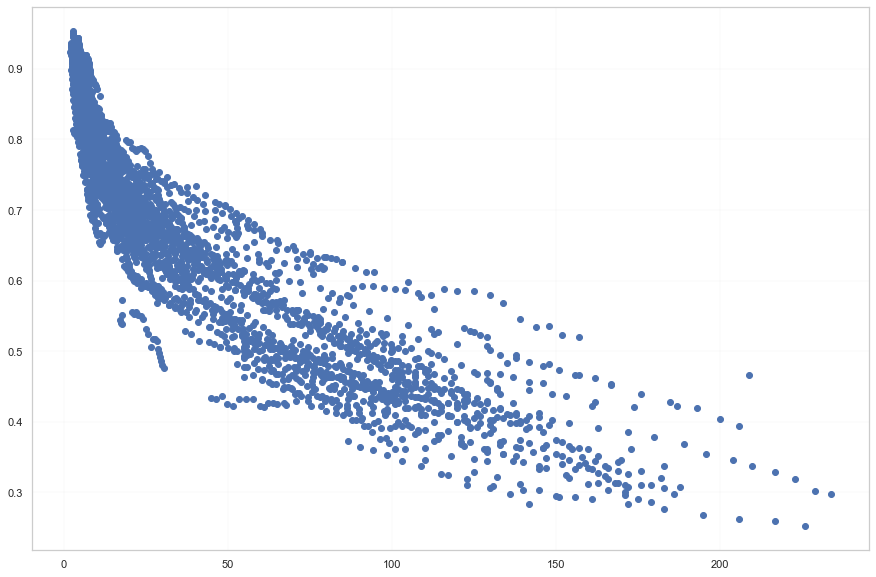

In [21]:
y = df["hdi"]
x = df["child_mortality"]

plt.scatter(x,y)

<AxesSubplot:xlabel='child_mortality', ylabel='hdi'>

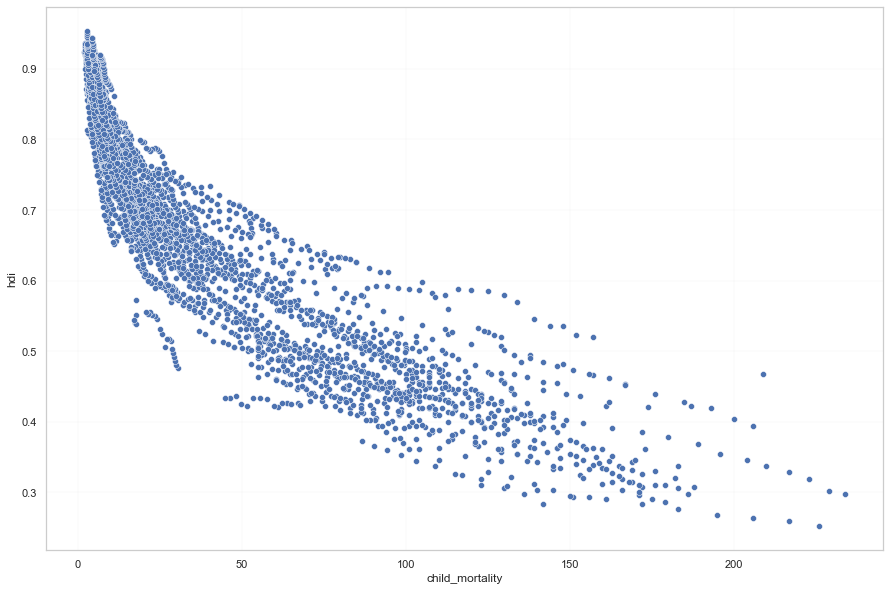

In [22]:
sns.scatterplot(data=df, y="hdi", x="child_mortality")


<AxesSubplot:xlabel='child_mortality', ylabel='hdi'>

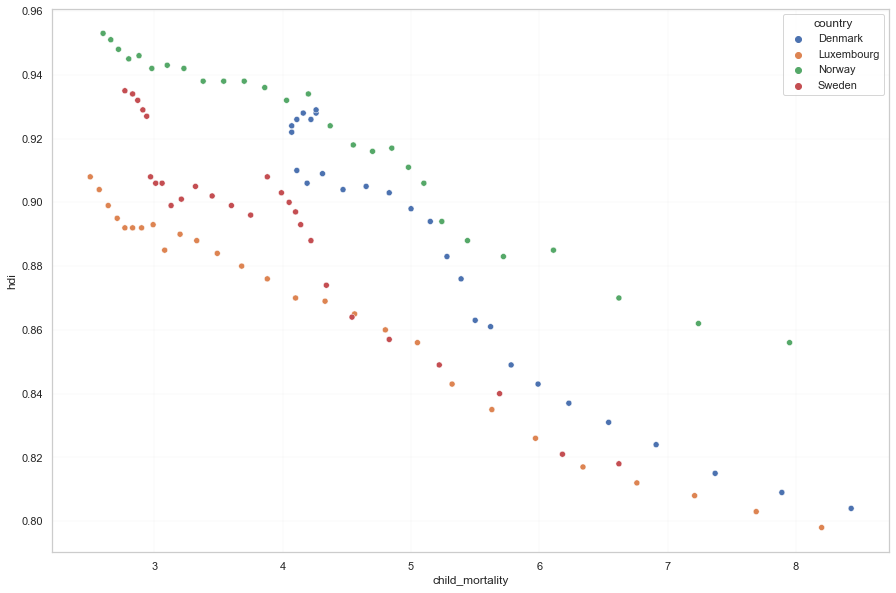

In [23]:
sns.scatterplot(data=df2, y="hdi", x="child_mortality", hue = "country")

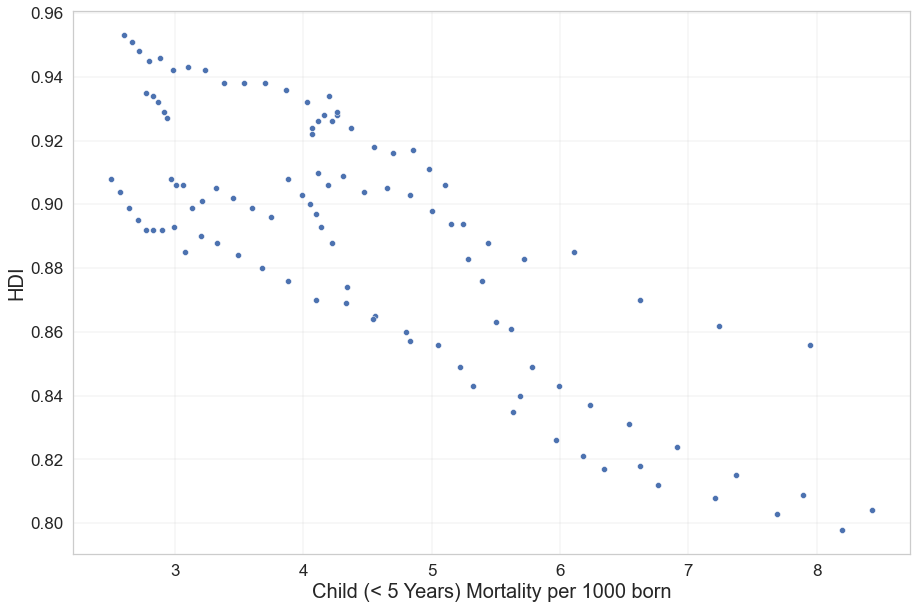

In [25]:
sns.set(style='whitegrid', rc={"grid.linewidth": 0.3})

g = sns.scatterplot(data=df2, y="hdi", x="child_mortality")
g.set_xlabel("Child (< 5 Years) Mortality per 1000 born",fontsize=20)
g.set_ylabel("HDI",fontsize=20)
g.tick_params(labelsize=17)

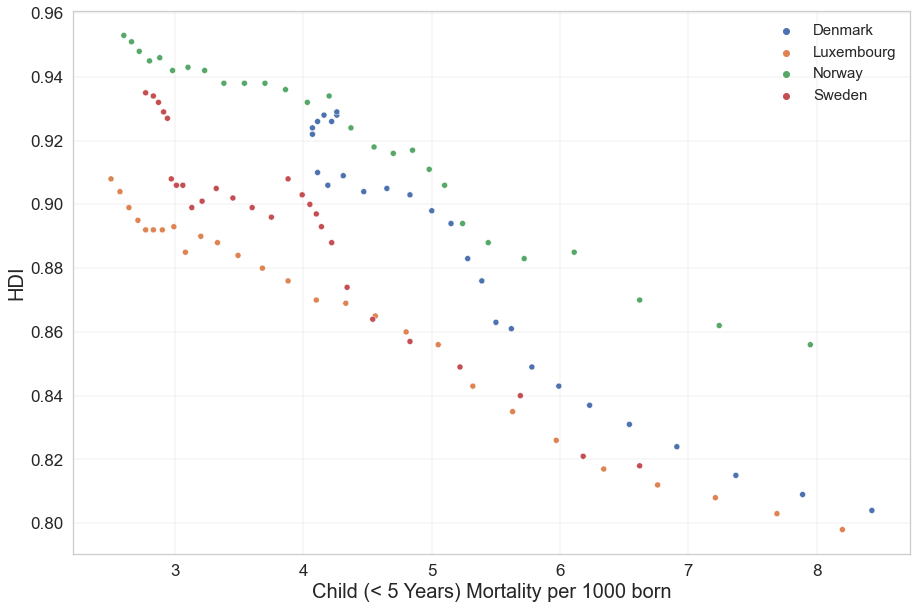

In [26]:
g= sns.scatterplot(data=df2, y="hdi", x="child_mortality", hue = "country")
g.set_xlabel("Child (< 5 Years) Mortality per 1000 born",fontsize=20)
g.set_ylabel("HDI",fontsize=20)
g.tick_params(labelsize=17)
plt.legend(loc="upper right", frameon=False, fontsize=15)


## Grid Plot

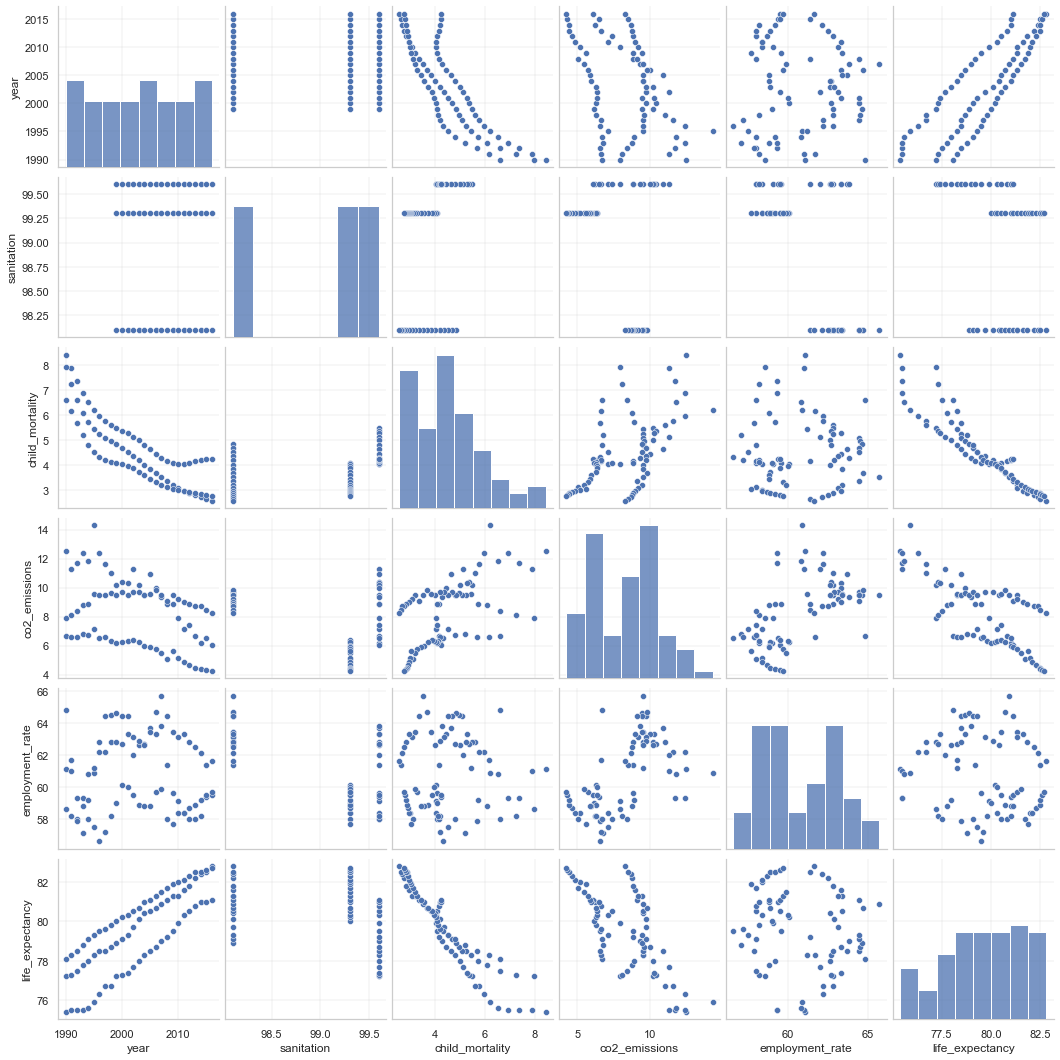

In [27]:
#Selecionando algumas colunas e países

df4 = df2[["country","year", "sanitation", "child_mortality", "co2_emissions", "employment_rate", "life_expectancy"]]
c = ['Norway', 'Sweden', 'Denmark', 'Switzerland', "Germany" ]

# Novo DataFrame com 4 países
df4 = df4[df4["country"].isin(c)]

sns.pairplot(data = df4)

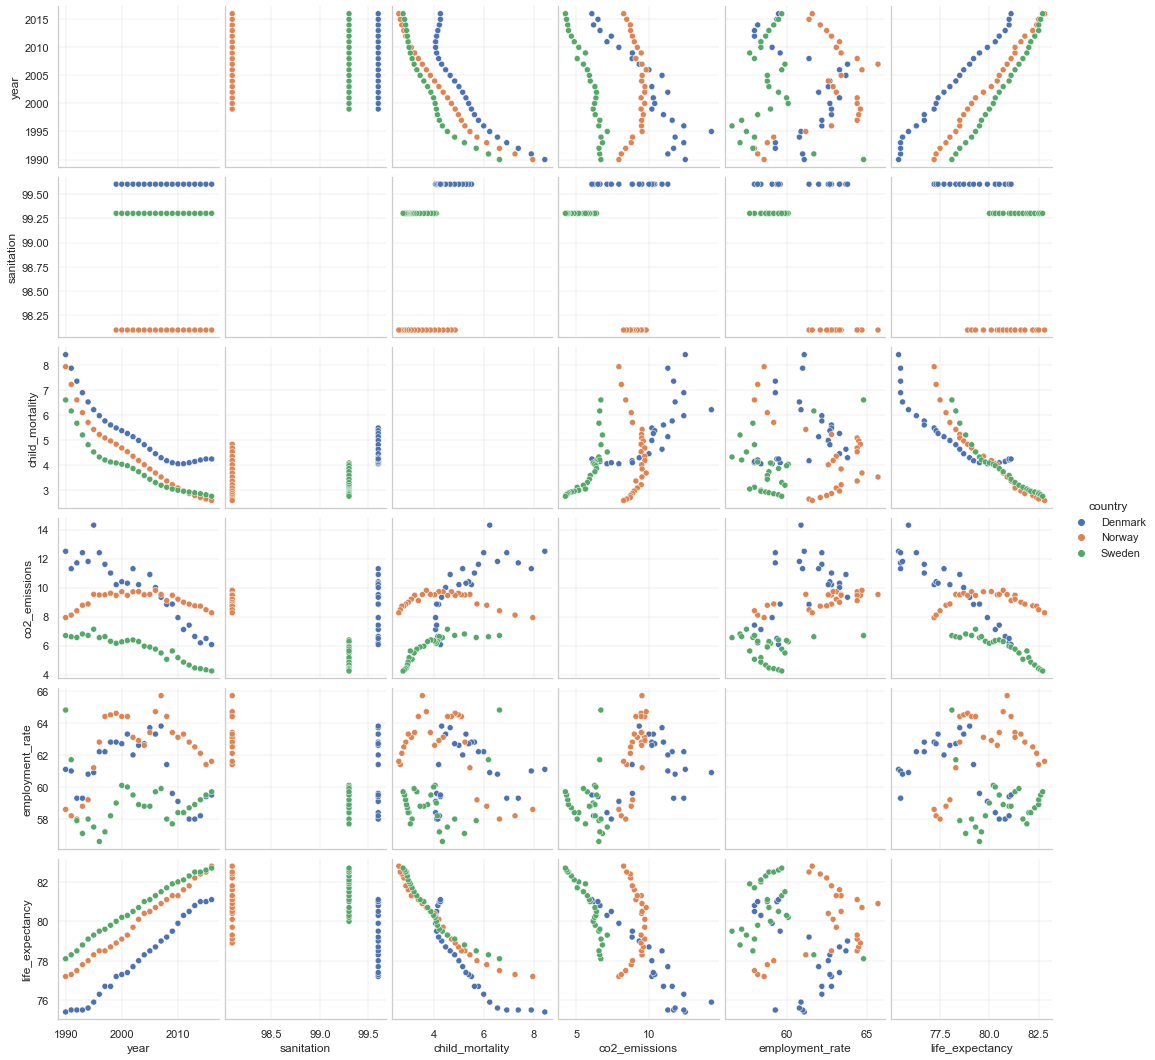

In [28]:
sns.pairplot(data = df4, hue ="country", diag_kind = "none")


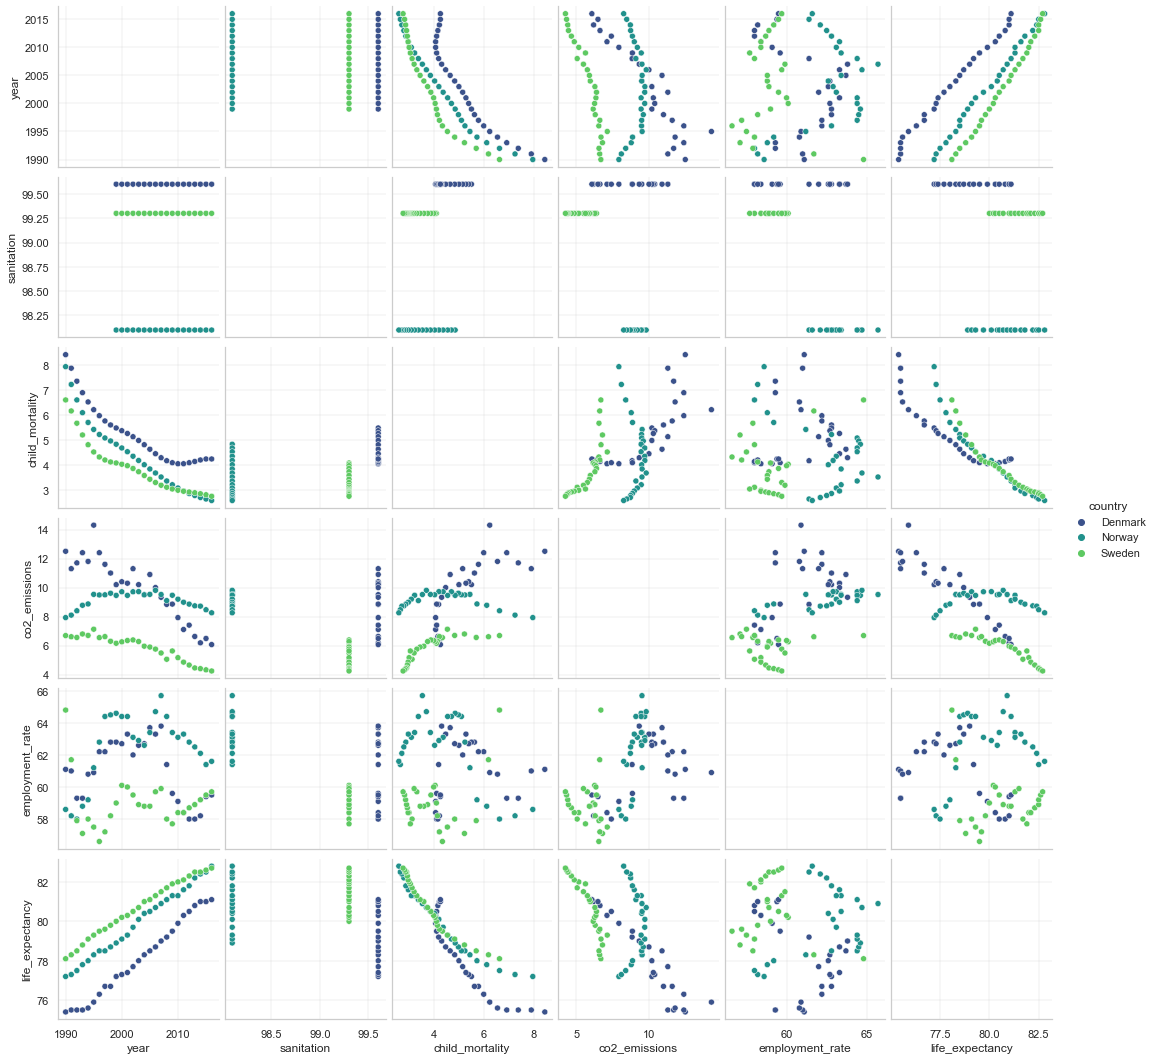

In [29]:
sns.pairplot(data = df4, hue ="country", diag_kind = "none", palette = "viridis")

# Correlação

## Correlação de Pearson, Sperman e Kendall

O coeficiente de correlação de Pearson (r) é um número entre -1 e 1. Em geral, a correlação expressa o grau em que, em média, duas variáveis mudam de forma correspondente.

O p-valor é a probabilidade de que você teria encontrado o resultado atual se o coeficiente de correlação fosse de fato zero (hipótese nula). Se esta probabilidade for menor que os 5% convencionais (P < 0,05), o coeficiente de correlação é chamado estatisticamente significativo.

In [77]:
pearson_coef, p_value = stats.pearsonr(df["hdi"], df["child_mortality"])
print("Pearson Correlation = ", pearson_coef)
print("p-value = ", p_value)

sperman_coef, p_value = stats.stats.spearmanr(df["hdi"], df["child_mortality"])
print("Sperman Correlation = ", sperman_coef)
print("p-value = ", p_value)

tau, p_value = stats.stats.kendalltau(df["hdi"], df["child_mortality"])
print("Kendall Correlation = ", tau)
print("p-value = ", p_value)

Pearson Correlation =  -0.8868012364245561
p-value =  0.0
Sperman Correlation =  -0.9517770880110796
p-value =  0.0
Kendall Correlation =  -0.8047090517282884
p-value =  0.0


## Matriz de correlações

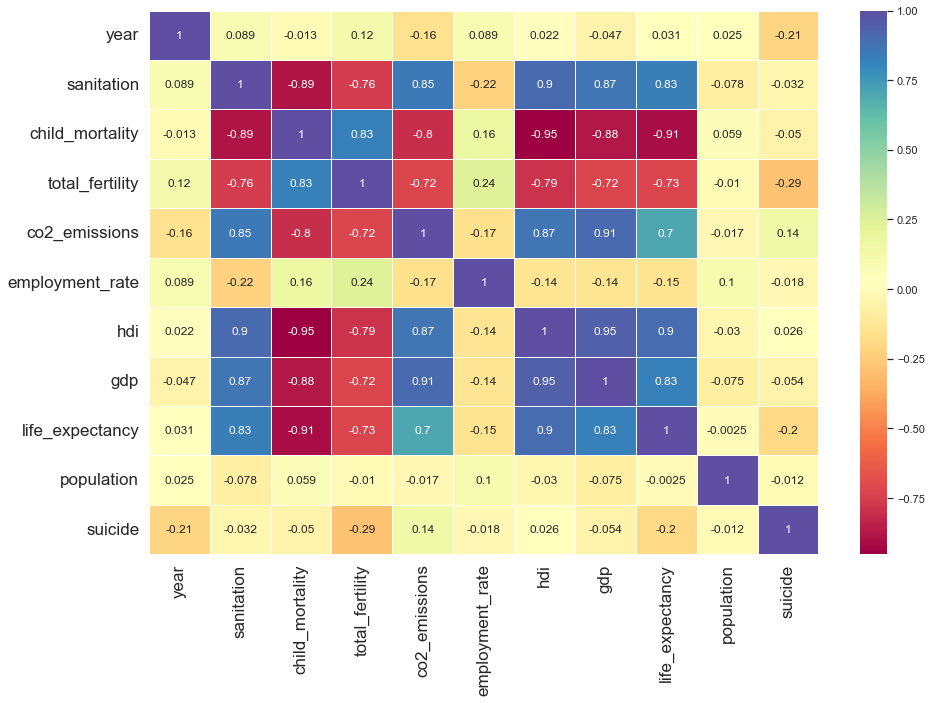

In [78]:
# Cria a matrix de correlações
Var_Corr = df.corr(method = "spearman") #method = "kendall" method = "spearman"
# plot the heatmap and annotation on it
g = sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, 
                yticklabels=Var_Corr.columns, 
                annot=True,linewidths=.5, 
                cmap = "Spectral")
g.tick_params(labelsize=17)

# Regression plot

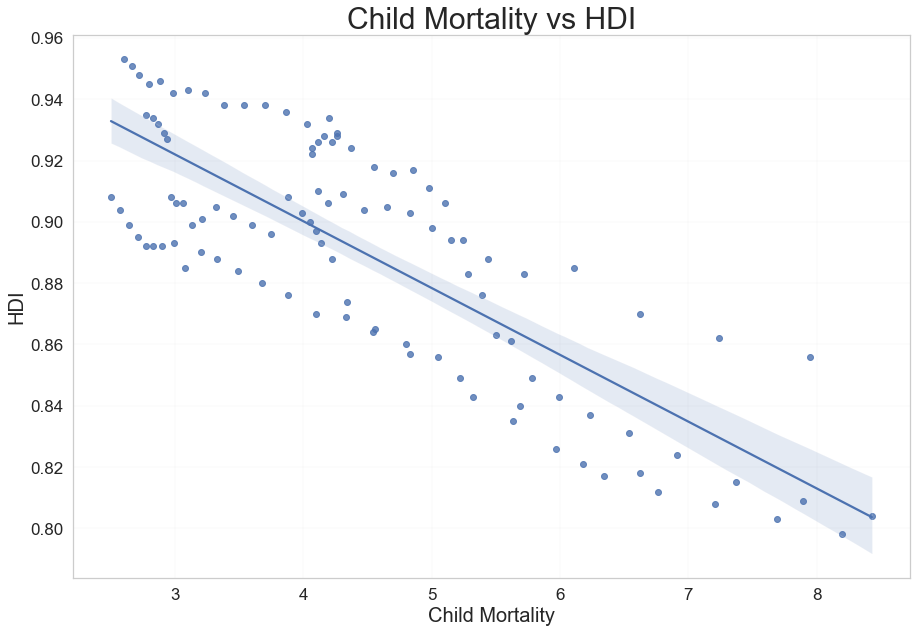

In [80]:
g = sns.regplot(y = "hdi", 
                x = "child_mortality", data = df2)

g.axes.set_title('Child Mortality vs HDI',fontsize=30)
g.set_xlabel("Child Mortality",fontsize=20)
g.set_ylabel("HDI",fontsize=20)
g.tick_params(labelsize=17)


In [81]:
df_corr = df2[["hdi","child_mortality"]].dropna()
pearson_coef, p_value = stats.pearsonr(df_corr["hdi"], df_corr["child_mortality"])
print("Pearson Correlation = ", pearson_coef)
print("p-value = ", p_value)

Pearson Correlation =  -0.8057331524269595
p-value =  7.373857911334023e-26


<AxesSubplot:xlabel='hdi', ylabel='child_mortality'>

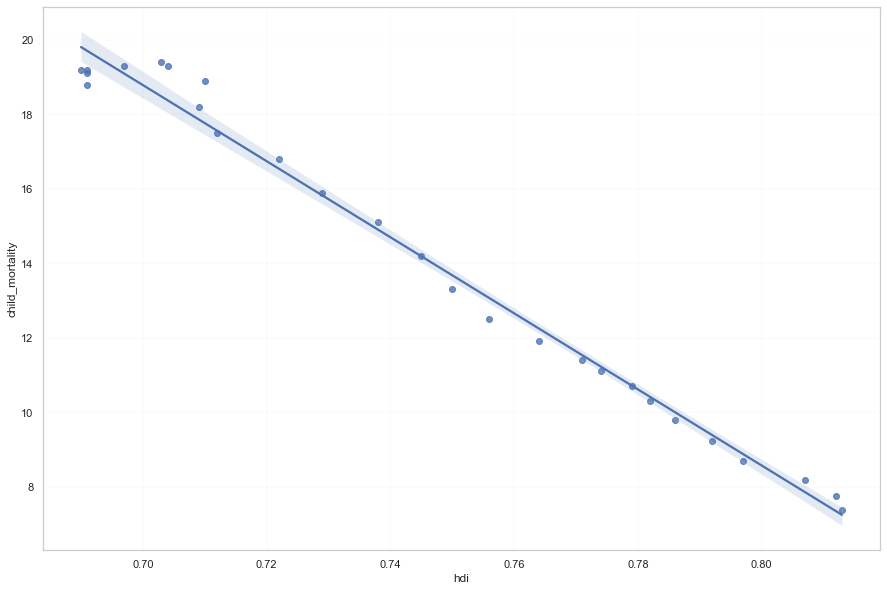

In [82]:
df_bulgaria = df3[df3['country']=='Bulgaria']

sns.regplot(x = "hdi", y = "child_mortality", data = df_bulgaria)


In [83]:
pearson_coef, p_value = stats.pearsonr(df_bulgaria["hdi"], df_bulgaria["child_mortality"])
print("Pearson Correlation = ", pearson_coef)
print("p-value = ", p_value)

Pearson Correlation =  -0.9937160747727538
p-value =  2.6597516504569286e-25


# Separando em países com HDI alto e baixo.

In [84]:
media_hdi = df["hdi"].mean()
mediana_hdi = df["hdi"].median()

print("Média do HDI: ", media_hdi)
print("Mediana do HDI: ", mediana_hdi)

Média do HDI:  0.6813606421256563
Mediana do HDI:  0.705


<AxesSubplot:xlabel='hdi', ylabel='Count'>

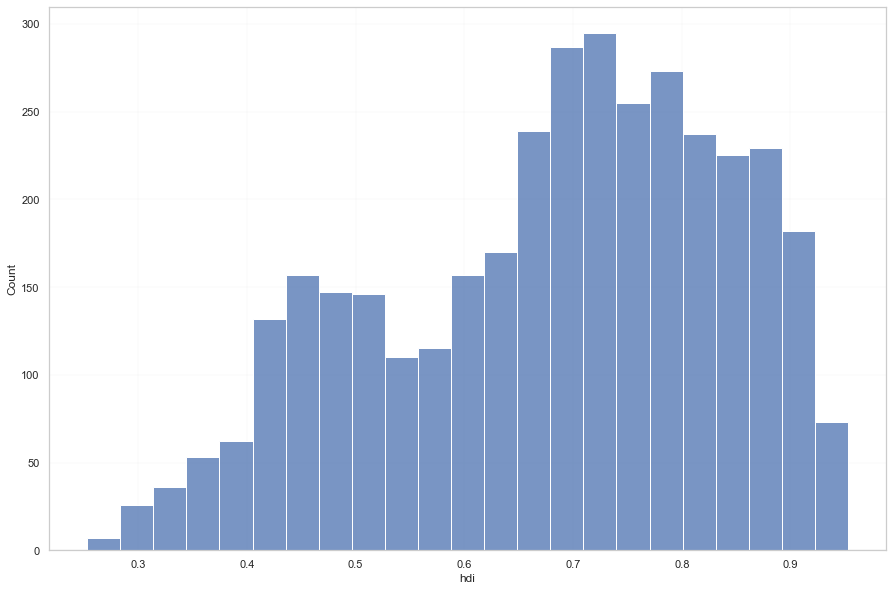

In [85]:
sns.histplot(data=df, x="hdi")

## Binning into High and Low HDI

In [86]:
#bins = np.linspace(min(df["hdi"]),max(df["hdi"]),3) # linearmente distribuidos
bins = [min(df["hdi"]),mediana_hdi ,max(df["hdi"]) ]  # corta na mediana
group_names = ["low","high"]
df["hdi_bin"] =  pd.cut(df["hdi"], bins, labels = group_names, include_lowest=True)
df.head()

,country,year,sanitation,child_mortality,total_fertility,co2_emissions,employment_rate,hdi,gdp,life_expectancy,population,suicide,hdi_bin
0,Afghanistan,1999,23.5,129.0,7.49,0.0370,45.9,0.345,578,54.7,20800000,NaN,low
1,Afghanistan,2000,23.5,125.0,7.39,0.0376,45.9,0.347,563,54.8,21600000,NaN,low
2,Afghanistan,2001,24.6,121.0,7.27,0.0471,47.7,0.378,1190,55.5,22600000,NaN,low
3,Afghanistan,2002,25.8,117.0,7.14,0.0509,47.9,0.387,1240,56.5,23700000,NaN,low
4,Afghanistan,2003,26.9,113.0,6.99,0.0368,47.5,0.400,1200,57.1,24700000,NaN,low


In [87]:
df_hdi = df['hdi_bin'].value_counts().to_frame()
df_hdi.reset_index(inplace = True)
df_hdi.columns = ['hdi_bin', 'total']
df_hdi.head()

,hdi_bin,total
0,low,1808
1,high,1805


## Separar o DF por HDI - Forma 1

In [88]:
df_high_hdi = df[df["hdi"] >= mediana_hdi]
df_high_hdi.head()

,country,year,sanitation,child_mortality,total_fertility,co2_emissions,employment_rate,hdi,gdp,life_expectancy,population,suicide,hdi_bin
32,Albania,2005,92.9,17.9,1.70,1.27,47.7,0.709,8600,76.9,3060000,NaN,high
33,Albania,2006,93.6,16.7,1.67,1.29,48.4,0.718,9180,77.5,3030000,4.06,high
34,Albania,2007,94.3,15.5,1.65,1.46,47.9,0.724,9940,77.6,3000000,5.34,high
35,Albania,2008,94.9,14.4,1.65,1.47,47.0,0.729,10300,78.0,2970000,NaN,high
36,Albania,2009,95.6,13.3,1.65,1.56,46.6,0.740,10800,78.1,2950000,3.08,high


In [89]:
df_country_high_hdi = df_high_hdi['country'].value_counts().to_frame().reset_index()
c = df_country_high_hdi['index'].unique().tolist()
print("Países com Alto HDI em algum ano:\n",c)

Países com Alto HDI em algum ano:
 ['Luxembourg', 'Norway', 'South Korea', 'Ireland', 'Malta', 'Denmark', 'Spain', 'Finland', 'Italy', 'Switzerland', 'France', 'Netherlands', 'Israel', 'Australia', 'Austria', 'Canada', 'United Kingdom', 'Greece', 'Portugal', 'Estonia', 'New Zealand', 'Sweden', 'Hong Kong, China', 'Singapore', 'Japan', 'Germany', 'Czech Republic', 'Iceland', 'Slovenia', 'Belgium', 'Slovak Republic', 'Hungary', 'United States', 'Poland', 'Kuwait', 'Lithuania', 'Argentina', 'Barbados', 'Chile', 'Croatia', 'Russia', 'Bulgaria', 'Latvia', 'Serbia', 'Cyprus', 'Qatar', 'Panama', 'Trinidad and Tobago', 'Costa Rica', 'Saudi Arabia', 'Bahrain', 'Bahamas', 'Malaysia', 'Uruguay', 'United Arab Emirates', 'Mexico', 'Romania', 'Oman', 'Jordan', 'Kazakhstan', 'Sri Lanka', 'Mauritius', 'Belarus', 'Ukraine', 'Libya', 'Cuba', 'Montenegro', 'Lebanon', 'Venezuela', 'Georgia', 'Armenia', 'Albania', 'Iran', 'North Macedonia', 'St. Lucia', 'Bosnia and Herzegovina', 'Azerbaijan', 'Colombia', '

## Separar o DF por HDI - Forma 2

In [90]:
df_high_hdi = df[df["hdi_bin"] == "high"]
df_high_hdi.head()

,country,year,sanitation,child_mortality,total_fertility,co2_emissions,employment_rate,hdi,gdp,life_expectancy,population,suicide,hdi_bin
32,Albania,2005,92.9,17.9,1.70,1.27,47.7,0.709,8600,76.9,3060000,NaN,high
33,Albania,2006,93.6,16.7,1.67,1.29,48.4,0.718,9180,77.5,3030000,4.06,high
34,Albania,2007,94.3,15.5,1.65,1.46,47.9,0.724,9940,77.6,3000000,5.34,high
35,Albania,2008,94.9,14.4,1.65,1.47,47.0,0.729,10300,78.0,2970000,NaN,high
36,Albania,2009,95.6,13.3,1.65,1.56,46.6,0.740,10800,78.1,2950000,3.08,high


Text(0.5, 1.0, 'HeatMap da Correlação de países com Alto HDI')

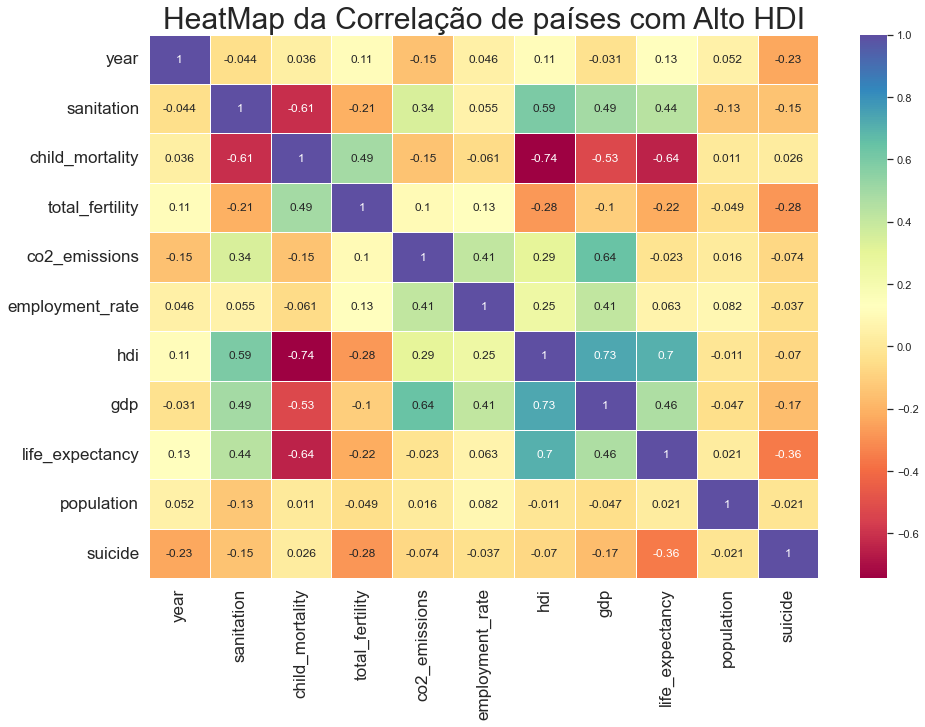

In [91]:
# Cria a matrix de correlações
Var_Corr = df_high_hdi.corr()
# plot the heatmap and annotation on it
g = sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True,linewidths=.5, cmap = "Spectral")
g.tick_params(labelsize=17)
g.axes.set_title('HeatMap da Correlação de países com Alto HDI',fontsize=30)



### Países com baixo HDI

Text(0.5, 1.0, 'HeatMap da Correlação de países com Baixo HDI')

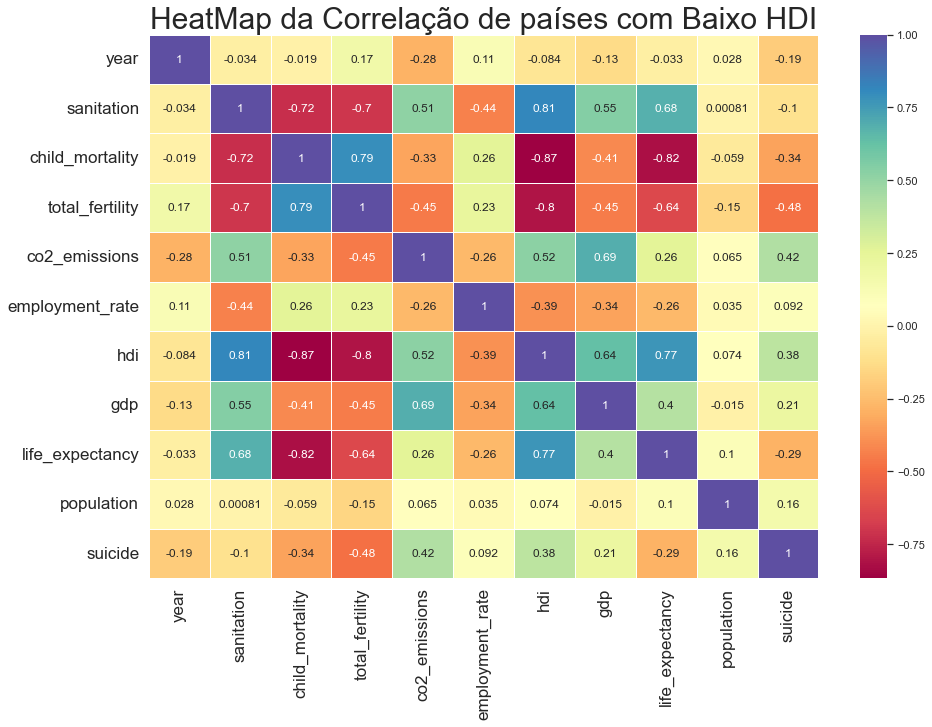

In [92]:
df_low_hdi = df[df["hdi_bin"] == "low"]
df_low_hdi.head()
# Cria a matrix de correlações
Var_Corr = df_low_hdi.corr()
# plot the heatmap and annotation on it
g=sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True,linewidths=.5, cmap = "Spectral")
g.tick_params(labelsize=17)
g.axes.set_title('HeatMap da Correlação de países com Baixo HDI',fontsize=30)

## Suicídios e desemprego 
### Países com baixo HDI

<AxesSubplot:xlabel='employment_rate', ylabel='suicide'>

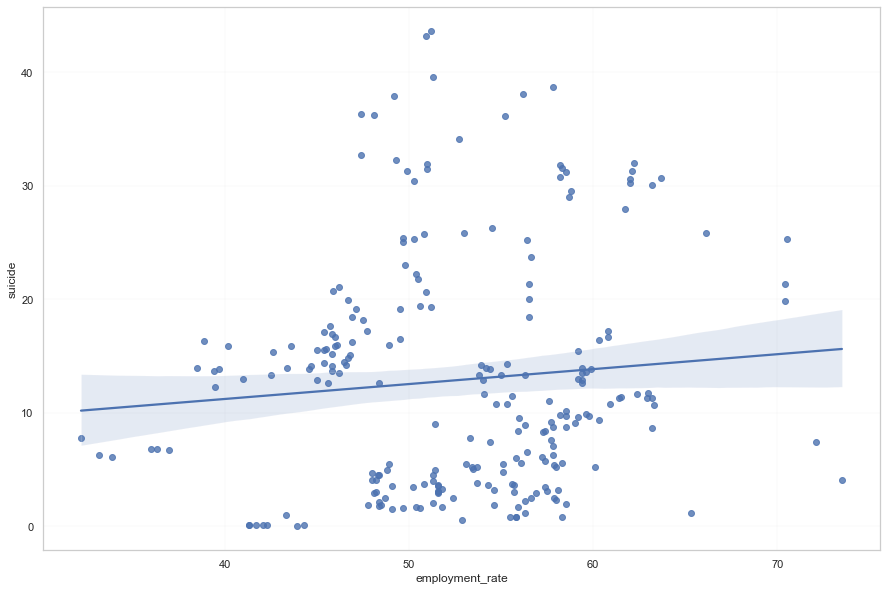

In [93]:
sns.regplot(x = "employment_rate", y = "suicide", data = df_low_hdi)

### Países com alto HDI

<AxesSubplot:xlabel='employment_rate', ylabel='suicide'>

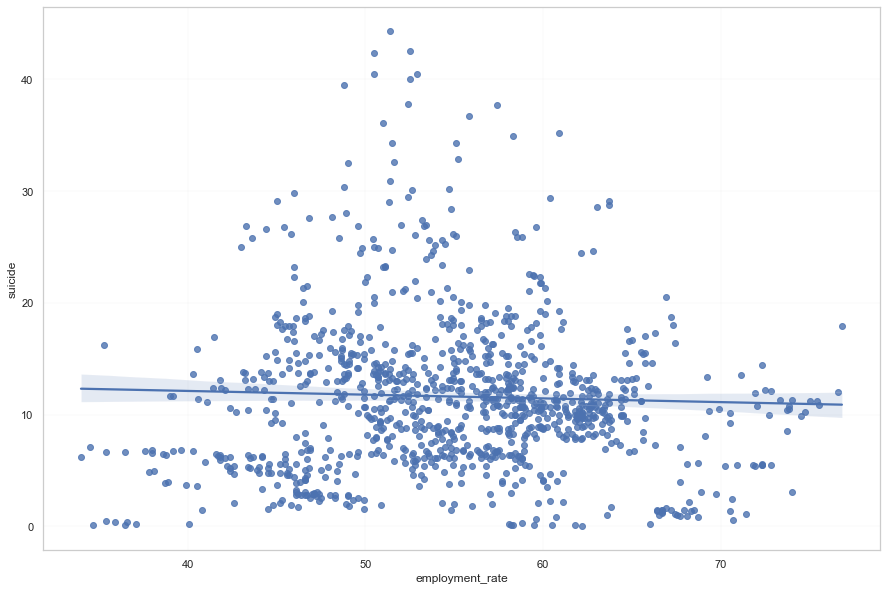

In [94]:
sns.regplot(x = "employment_rate", y = "suicide", data = df_high_hdi)

# Existe diferença estatística na taxa o emprego (15 anos ou mais) em países com alto e baixo HDI ?

### Teste T

In [46]:
ttest ,pval = stats.ttest_ind(df_high_hdi["employment_rate"].dropna(), 
                              df_low_hdi["employment_rate"].dropna())
print("Estatística do teste: ",ttest)
print("P-Valor: ",pval)

Estatística do teste:  -7.643915057980762
P-Valor:  2.6835497138915347e-14


Um p-valor maior que um limiar escolhido (por exemplo, 5% ou 1%) indica que nossa observação não é tão improvável que tenha ocorrido por acaso. Portanto, não rejeitamos a hipótese nula de médias populacionais iguais. Se o p-valor for menor que nosso limiar, então temos evidências contra a hipótese nula de médias populacionais iguais.


### Teste Z

In [96]:
from statsmodels.stats import weightstats as stests

ztest ,pval = stests.ztest(df_high_hdi["employment_rate"].dropna(), 
                           df_low_hdi["employment_rate"].dropna(), 
                           value=0, alternative='two-sided')
print("Estatística do teste: ",ztest)
print("P-Valor: ",pval)


Estatística do teste:  -7.643915057980762
P-Valor:  2.1071444319902693e-14


## Vamos explorar um pouquinho mais essa diferença

In [99]:
a = df_high_hdi["employment_rate"].dropna()
conf_interval = stats.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=stats.sem(a))
print("Confidence Interval: ", conf_interval)

df_high_hdi["employment_rate"].describe()

Confidence Interval:  (55.2966460448533, 56.101137888664645)


count    1805.000000
mean       55.698892
std         8.713461
min        28.900000
25%        50.400000
50%        56.500000
75%        60.900000
max        87.400000
Name: employment_rate, dtype: float64

In [100]:
a = df_low_hdi["employment_rate"].dropna()
conf_interval = stats.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=stats.sem(a))
print("Confidence Interval: ", conf_interval)

df_low_hdi["employment_rate"].describe()

Confidence Interval:  (57.89130519289605, 59.06997799294469)


count    1808.000000
mean       58.480642
std        12.776838
min        28.900000
25%        49.500000
50%        58.000000
75%        68.200000
max        87.800000
Name: employment_rate, dtype: float64

<AxesSubplot:xlabel='hdi_bin', ylabel='employment_rate'>

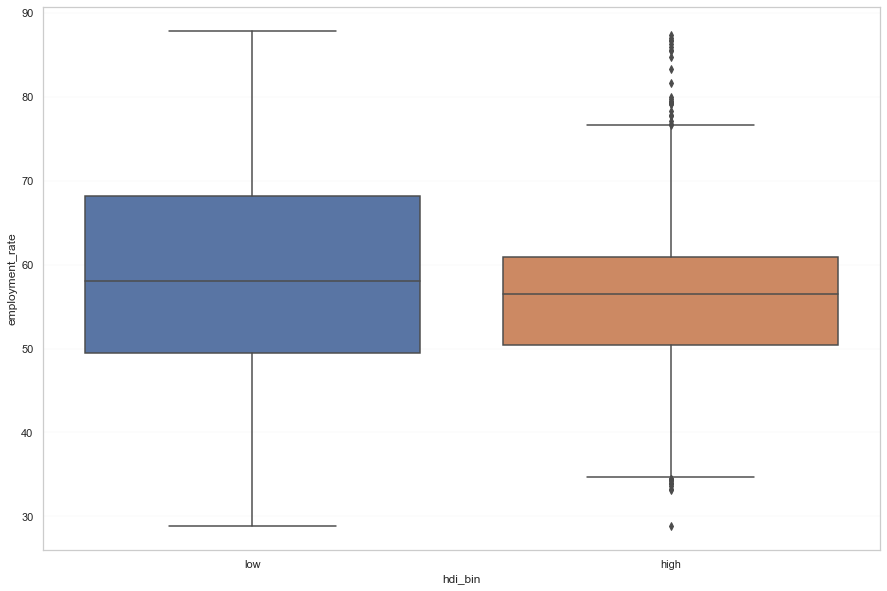

In [101]:
sns.boxplot(data=df, y="employment_rate", x = "hdi_bin")

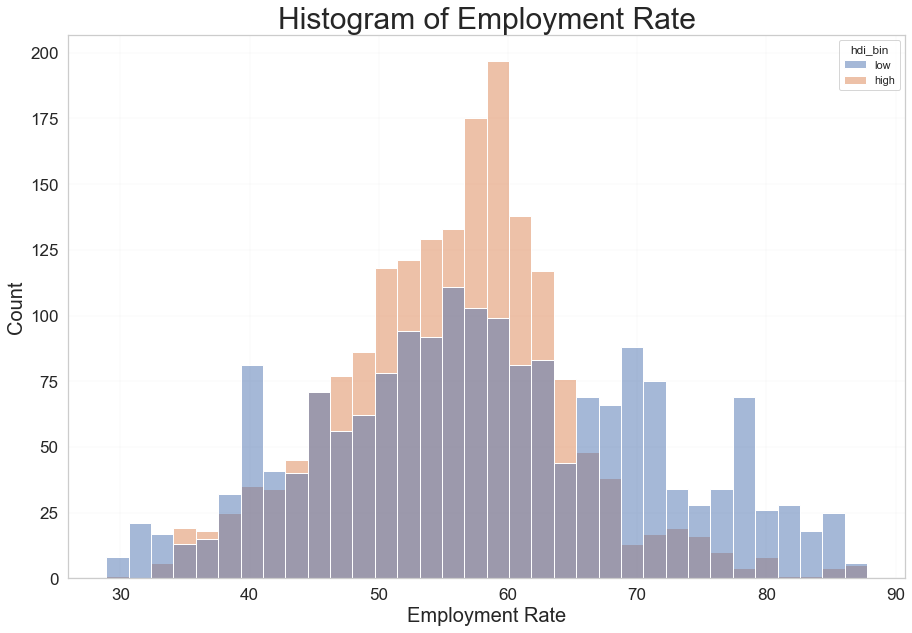

In [102]:
g = sns.histplot(data=df, x="employment_rate", hue = "hdi_bin")
g.axes.set_title('Histogram of Employment Rate',fontsize=30)
g.set_xlabel("Employment Rate",fontsize=20)
g.set_ylabel("Count",fontsize=20)
g.tick_params(labelsize=17)

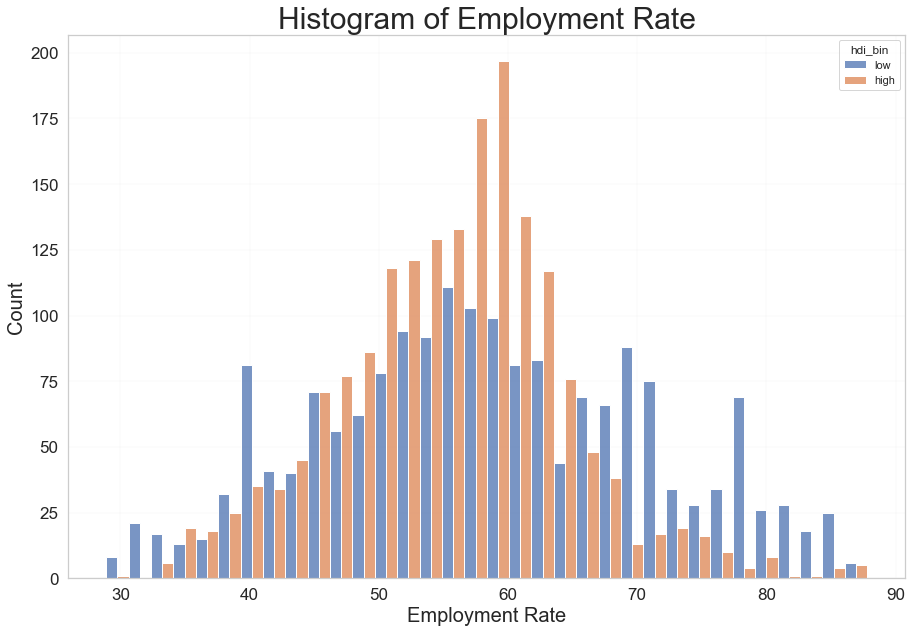

In [103]:
g = sns.histplot(data=df, x="employment_rate", hue = "hdi_bin", multiple="dodge")
g.axes.set_title('Histogram of Employment Rate',fontsize=30)
g.set_xlabel("Employment Rate",fontsize=20)
g.set_ylabel("Count",fontsize=20)
g.tick_params(labelsize=17)



# Entrega LAB04

Repita a análise comparando desemprego para países com alto e baixo HDI, mas agora para as variáveis emissão de Co2 e child mortality.

Entrega mínima:

* Testes de hipóteses
* Gráficos, hitogramas
* Correlação entre emissão de Co2 e child mortality

Mas .... você tem alguma outra proposta de gráficos ou análises? Se sim entregue


## References

* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
* https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.kendalltau.html
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
* https://www.gapminder.org/data/


## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-06  | 0.9  | <a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pécora</a> |  Initial development |
| 2021-03-12  | 1.0  | <a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pécora</a> |  Basic Stats|
| 2021-03-29  | 1.1  | <a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pécora</a> |  Graphics and PandasProfile|

<hr>